# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach to analyzing data sets using visual methods with the purpose of summarizing the main charaters of data. It is essential to perform EDA because it helps us to identify interesting observation which could be critical for our model building process.

In [1]:
# import the packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/Users/kshit/Desktop/Python/Projects/Cleaned_data.csv')

In [6]:
df.describe()

,Rating,Founded,Hourly,Employer_provided,min_salary,max_salary,avg_salary,same_state,age,Python,R_Std,spark,aws,excel
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000


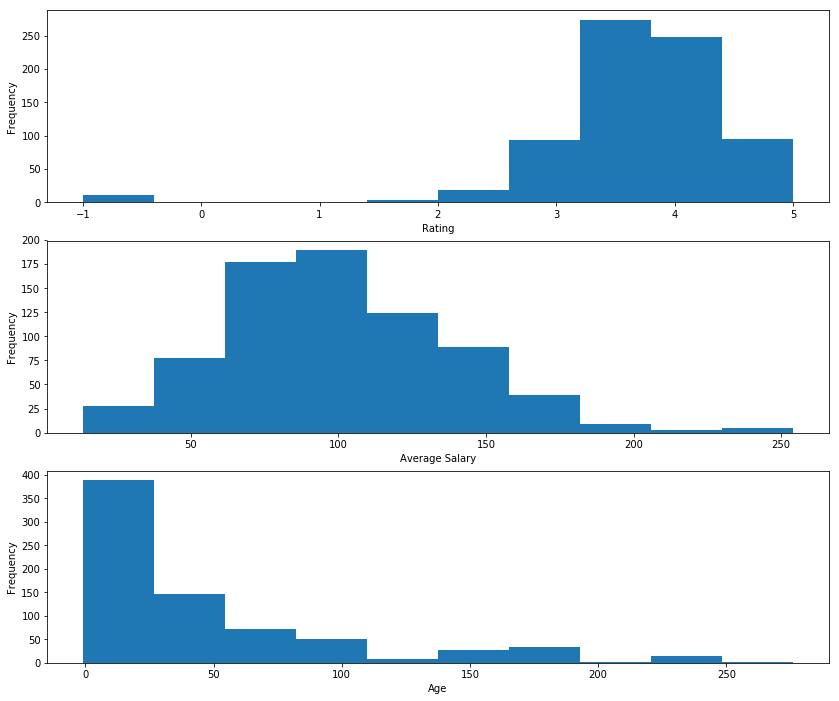

In [13]:
fig = plt.figure(figsize=(14,12))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3,1,3)

n, bins, patches = ax1.hist(df.Rating)
ax1.set_xlabel('Rating')
ax1.set_ylabel('Frequency')

n, bins, patches = ax2.hist(df.avg_salary)
ax2.set_xlabel('Average Salary')
ax2.set_ylabel('Frequency')

n, bins, patches = ax3.hist(df.age)
ax3.set_xlabel('Age')
ax3.set_ylabel('Frequency')

plt.show()

From the above figure, we can see inder following three things:
     1. Most of the company has rating from 3.5 to 4.5 star.
     2. Data Scientist seems to be paid around 100k annually most of the time.
     3. Most of the company demanding data scientist have just started. Data Scientist has huge demand among startups 
        company.

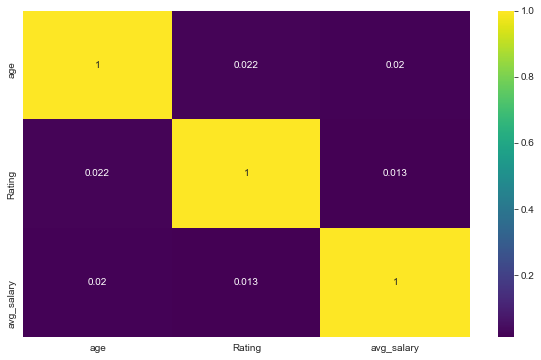

In [21]:
# checking for correlation

k = 3 
cols = df[['age','avg_salary','Rating']].corr().nlargest(k, 'age')['age'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Plotting the graph 

In [23]:
df_ctgry = df[['Size','Type of ownership','Industry','Sector','Revenue','job_state',
               'Python','R_Std','spark','aws','excel','Job_Title','Seniority']]

graph for Size: total = 9


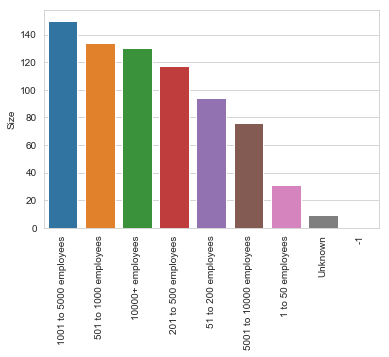

graph for Type of ownership: total = 11


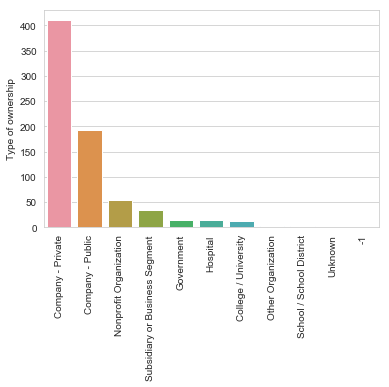

graph for Industry: total = 60


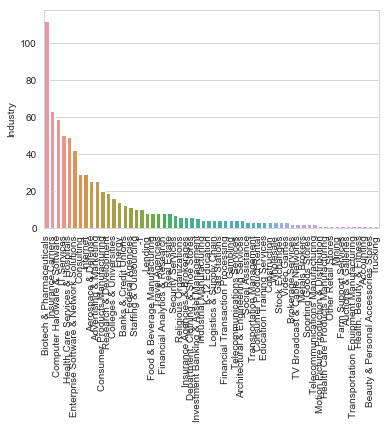

graph for Sector: total = 25


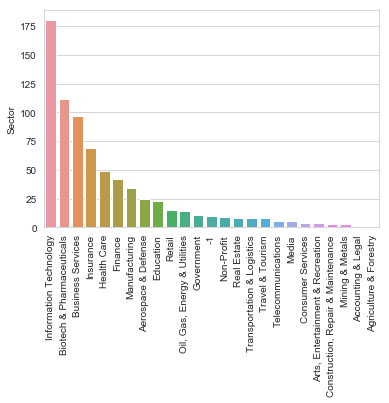

graph for Revenue: total = 14


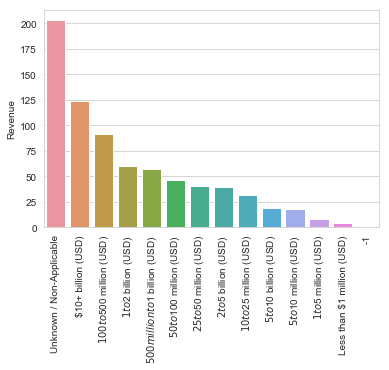

graph for job_state: total = 37


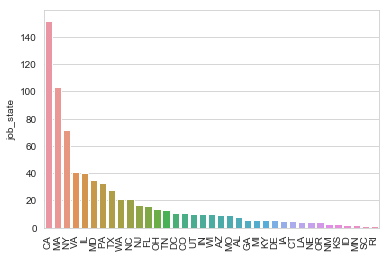

graph for Python: total = 2


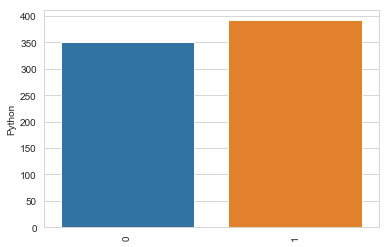

graph for R_Std: total = 2


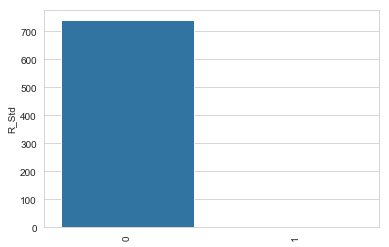

graph for spark: total = 2


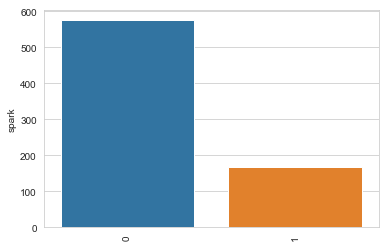

graph for aws: total = 2


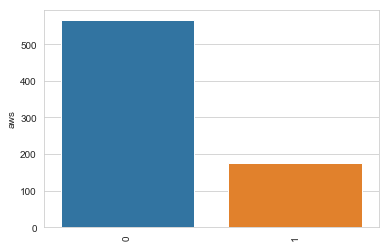

graph for excel: total = 2


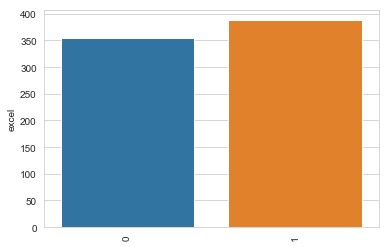

graph for Job_Title: total = 7


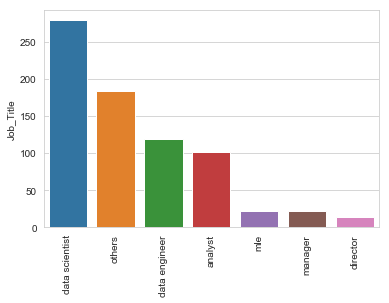

graph for Seniority: total = 3


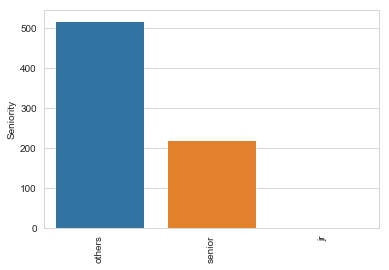

In [25]:
for i in df_ctgry.columns:
    cat_num = df_ctgry[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Grouping the data for further analysis.

In [26]:
pd.pivot_table(df, index='Job_Title', values='avg_salary')

,avg_salary
Job_Title,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
others,84.853261


In [27]:
pd.pivot_table(df, index = ['Job_Title','Seniority'], values='avg_salary')

avg_salary
Job_Title      Seniority            
analyst        jr          53.250000
               others      61.308219
               senior      79.092593
data engineer  others      96.701220
               senior     124.689189
data scientist jr         106.500000
               others     107.043011
               senior     138.956522
director       others     168.607143
manager        others      84.022727
mle            others     119.133333
               senior     142.071429
others         others      73.988189
               senior     109.061404

In [29]:
pd.pivot_table(df[df.Job_Title=='data scientist'], index='job_state',
               values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


Generating Wordcloud

In [31]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

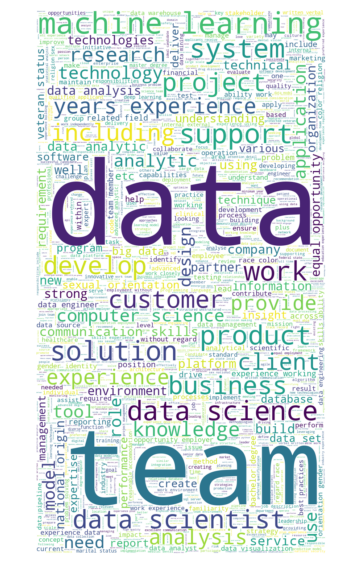

In [33]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()